# Sales Data Analysis and KPI Calculation

In [13]:
import sqlite3
import locale
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [14]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [15]:
con = 'sqlite:///db'

In [16]:
%sql $con

'Connected: @db'

In [18]:
df = pd.read_csv('E:/Study Material/Tampere - Grad/Assessements/BI Developer Assignment - Internship 2023/item_data.csv')
df.to_sql('items', sqlite3.connect('db'), index=False)

1039559

In [20]:
df1 = pd.read_csv('E:/Study Material/Tampere - Grad/Assessements/BI Developer Assignment - Internship 2023/purchase_data_final.csv')
df1.to_sql('purchases', sqlite3.connect('db'), index=False)

237070

In [21]:
df2 = pd.read_csv('E:/Study Material/Tampere - Grad/Assessements/BI Developer Assignment - Internship 2023/purchase_item_data_final.csv')
df2.to_sql('purchases_items', sqlite3.connect('db'), index=False)

1652182

# Items Data

In [19]:
%%sql 
SELECT * FROM items LIMIT 10

 * sqlite:///db
Done.


Unnamed: 0,VENUE_ID,TIMESTAMP,BRAND,MANUFACTURER,COST_PER_UNIT,COST_PER_UNIT_EUR,CURRENCY,APPLICABLE_TAX_PERC,PRODUCT_ID,ITEM_IDENTIFIER,EXTERNAL_ID
0,389290dde1,2022-02-01 00:00:00,None,Tern1,3.72,3.72,EUR,0.2,1e4998ae71,b10f899028,None
1,43448c7715,None,None,None,24.8,1.0401153185919356,CZK,0.15,None,ee7a992cac,None
2,6adc2fbb91,None,Grøn Balance,VALSEMØLLEN A/S PRIVATE LABEL,6.74,0.9060928831243696,DKK,0.25,740ede1018,3ea9f51fb7,None
3,9900b487b1,2022-09-13 00:00:00,ACTIVIA,"UAB Eugesta, Kibirkšties g. 8. Vilnius",1.56,1.56,EUR,0.21,e0c1503a4a,16feda8e89,c6105d7e2a
4,80ec4c53da,2022-01-01 00:00:00,ACTIVIA,None,466.0,1.1289365262633262,HUF,0.18,edd05a3886,cc2c5e45fc,None
5,de707394bc,2021-12-01 00:00:00,Vitamineral,Y,0.74,0.74,EUR,0.2,None,a707a54455,None
6,4332da8cb2,2022-06-29 00:00:00,Corny,Schwartau,1.5092,1.5092,EUR,0.095,f12b27b7dd,100da60788,None
7,a3bd22fac6,2022-11-03 00:00:00,TOMS,TOMS SVERIGE AB,7.48,0.6859816980449798,SEK,0.12,bda61dd510,2bc1b00ef0,None
8,80ec4c53da,2022-12-01 00:00:00,Milka,None,2518.0,6.248548152442409,HUF,0.27,2ca96809c3,4d2a6395a8,None
9,e6858c2a86,2022-08-29 00:00:00,None,None,3.36,3.36,EUR,0.0,1cd5ab06ea,e343b0ff03,None


# Purchases Data

In [23]:
%%sql 
SELECT * FROM purchases LIMIT 10

 * sqlite:///db
Done.


Unnamed: 0,PURCHASE_ID,TIME_RECEIVED,TIME_DELIVERED,CURRENCY,COUNTRY,VENUE_ID
0,c766bf63dc,2022-07-14 06:01:34.426,2022-07-14 06:30:11.423,CZK,CZE,691d84b2f9
1,97b4d66216,2022-07-14 08:02:15.789,2022-07-14 08:28:26.345,CZK,CZE,691d84b2f9
2,9cadf4d3c4,2022-07-14 06:02:36.614,2022-07-14 06:30:02.425,CZK,CZE,691d84b2f9
3,66cf34e8d3,2022-07-14 14:04:45.640,2022-07-14 14:35:00.264,CZK,CZE,691d84b2f9
4,94fac08438,2022-07-14 19:04:46.876,2022-07-14 19:26:16.940,CZK,CZE,691d84b2f9
5,ebbeb05442,2022-07-14 06:05:02.972,2022-07-14 06:37:53.363,CZK,CZE,691d84b2f9
6,d0d8f3f58f,2022-07-14 07:06:01.765,2022-07-14 07:23:27.766,CZK,CZE,691d84b2f9
7,8b47d8538a,2022-07-14 12:07:45.994,2022-07-14 12:28:48.297,CZK,CZE,691d84b2f9
8,247223c02a,2022-07-14 09:08:18.421,2022-07-14 09:37:48.296,CZK,CZE,691d84b2f9
9,f601fcfef5,2022-07-14 12:09:36.258,2022-07-14 12:23:11.041,CZK,CZE,691d84b2f9


# Purchases_Items Data

In [24]:
%%sql 
SELECT * FROM purchases_items LIMIT 10

 * sqlite:///db
Done.


Unnamed: 0,PRODUCT_ID,PURCHASE_ID,COUNT,VENUE_ID,BASEPRICE,VAT_PERCENTAGE
0,0e67b01e73,8d729f3e3a,1,5be413ed1f,1.19,20.0
1,24f9c620c6,8d729f3e3a,1,5be413ed1f,2.49,20.0
2,27e0da88f2,8d729f3e3a,1,5be413ed1f,2.59,20.0
3,7ab5d8bbe6,8d729f3e3a,1,5be413ed1f,2.69,20.0
19,2b21ae2ec0,dbc88373f6,6,5c47e55304,22.95,25.0
20,0ba3c3e7e2,dbc88373f6,2,5c47e55304,34.5,25.0
21,ddd557d878,dbc88373f6,2,5c47e55304,19.5,25.0
22,f9c4a9933e,dbc88373f6,1,5c47e55304,21.5,25.0
24,ec423edaa2,dbc88373f6,8,5c47e55304,20.95,25.0
25,8df279ab62,dbc88373f6,1,5c47e55304,35.95,25.0


In [25]:
%%sql 
CREATE TABLE Cost_Conversion AS
SELECT VENUE_ID, CURRENCY, COST_PER_UNIT, COST_PER_UNIT_EUR, COST_PER_UNIT_EUR/COST_PER_UNIT AS CONV
FROM items;

 * sqlite:///db
Done.


[]

In [26]:
%%sql 
Select * from Cost_Conversion
limit 20

 * sqlite:///db
Done.


VENUE_ID,CURRENCY,COST_PER_UNIT,COST_PER_UNIT_EUR,CONV
389290dde1,EUR,3.72,3.72,1.0
43448c7715,CZK,24.8,1.0401153185919356,0.04194013381419095
6adc2fbb91,DKK,6.74,0.9060928831243696,0.13443514586414979
9900b487b1,EUR,1.56,1.56,1.0
80ec4c53da,HUF,466.0,1.1289365262633262,0.0024226105713805283
de707394bc,EUR,0.74,0.74,1.0
4332da8cb2,EUR,1.5092,1.5092,1.0
a3bd22fac6,SEK,7.48,0.6859816980449798,0.09170878316109354
80ec4c53da,HUF,2518.0,6.248548152442409,0.0024815520859580655
e6858c2a86,EUR,3.36,3.36,1.0


In [27]:
%%sql 
SELECT p.PURCHASE_ID, p.COUNTRY, p.VENUE_ID, 
       SUM(i.COUNT * it.COST_PER_UNIT_EUR * cc.CONV) AS TOTAL_COST_EUR, 
       SUM(i.COUNT * i.BASEPRICE) AS TOTAL_REVENUE, 
       SUM(i.COUNT * (i.BASEPRICE - it.COST_PER_UNIT_EUR * cc.CONV)) AS TOTAL_PROFIT_EUR
FROM purchases p
JOIN purchases_items i ON p.PURCHASE_ID = i.PURCHASE_ID
JOIN items it ON i.VENUE_ID = it.VENUE_ID AND i.PRODUCT_ID = it.PRODUCT_ID
JOIN Cost_Conversion cc ON it.VENUE_ID = cc.VENUE_ID AND it.CURRENCY = cc.CURRENCY
GROUP BY p.PURCHASE_ID,  p.COUNTRY, p.VENUE_ID
LIMIT 10;

 * sqlite:///db
(sqlite3.OperationalError) database or disk is full
[SQL: SELECT p.PURCHASE_ID, p.COUNTRY, p.VENUE_ID, 
       SUM(i.COUNT * it.COST_PER_UNIT_EUR * cc.CONV) AS TOTAL_COST_EUR, 
       SUM(i.COUNT * i.BASEPRICE) AS TOTAL_REVENUE, 
       SUM(i.COUNT * (i.BASEPRICE - it.COST_PER_UNIT_EUR * cc.CONV)) AS TOTAL_PROFIT_EUR
FROM purchases p
JOIN purchases_items i ON p.PURCHASE_ID = i.PURCHASE_ID
JOIN items it ON i.VENUE_ID = it.VENUE_ID AND i.PRODUCT_ID = it.PRODUCT_ID
JOIN Cost_Conversion cc ON it.VENUE_ID = cc.VENUE_ID AND it.CURRENCY = cc.CURRENCY
GROUP BY p.PURCHASE_ID,  p.COUNTRY, p.VENUE_ID
LIMIT 10;]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


# Task 1 - Profitablity of Each Purchase

In [214]:
%%sql 
SELECT 
  purchases.PURCHASE_ID, purchases.VENUE_ID, purchases.CURRENCY, purchases.COUNTRY,
  ROUND(SUM((purchases_items.BASEPRICE * purchases_items.COUNT) - 
          (items.COST_PER_UNIT * purchases_items.COUNT)), 3) AS PROFIT
FROM 
  purchases
  JOIN purchases_items ON purchases.PURCHASE_ID = purchases_items.PURCHASE_ID 
  and purchases.VENUE_ID = purchases_items.VENUE_ID
  JOIN items ON purchases_items.PRODUCT_ID = items.PRODUCT_ID 
  and purchases_items.VENUE_ID = items.VENUE_ID
GROUP BY
    purchases.PURCHASE_ID, purchases.VENUE_ID, purchases.CURRENCY, purchases.COUNTRY
ORDER BY  
    PROFIT DESC
LIMIT 
    10

 * sqlite:///db
Done.


PURCHASE_ID,VENUE_ID,CURRENCY,COUNTRY,PROFIT
b8fed51763,acb16b09b8,HUF,HUN,49964.929
0774b97c99,3fd16afedf,HUF,HUN,45775.479
c405a3f893,c6d84e08d8,HUF,HUN,41361.621
1c726313e3,3fd16afedf,HUF,HUN,40561.68
dd81d12c47,acb16b09b8,HUF,HUN,36419.0
e78880aedc,acb16b09b8,HUF,HUN,34946.0
1c32eb8c19,79ca503f39,HUF,HUN,34246.689
030dff28cb,acb16b09b8,HUF,HUN,32475.894
6fde1b4c30,ac120988ab,HUF,HUN,32021.8
c0bbe8c353,6ab5d2721c,HUF,HUN,31276.677


# Task 2

# Top 10 Venues with the Highest Margins

In [210]:
%%sql os <<
SELECT 
  purchases.VENUE_ID, AVG(purchases_items.COUNT) AS AVG_ORDER_SIZE,
  (SUM((purchases_items.BASEPRICE * purchases_items.COUNT) 
   - (items.COST_PER_UNIT * purchases_items.COUNT)) / 
   SUM(purchases_items.BASEPRICE * purchases_items.COUNT))*100 
   AS MARGIN_PERC
FROM 
  purchases
  JOIN purchases_items ON purchases.PURCHASE_ID = purchases_items.PURCHASE_ID 
  and purchases.VENUE_ID = purchases_items.VENUE_ID
  JOIN items ON purchases_items.PRODUCT_ID = items.PRODUCT_ID 
   and purchases_items.VENUE_ID = items.VENUE_ID
GROUP BY 
  purchases.VENUE_ID, purchases.CURRENCY
ORDER BY 
  MARGIN_PERC DESC
LIMIT 10

 * sqlite:///db
Done.
Returning data to local variable os


In [211]:
df_osize= os.DataFrame()
df_osize

,VENUE_ID,AVG_ORDER_SIZE,MARGIN_PERC
0,d12bdb77f7,1.354458,91.563347
1,9a6cfb43e7,1.386957,91.500617
2,5c47e55304,1.165264,43.382720
3,da2b0f9a4f,1.136793,42.720183
4,30aa68237d,1.158009,42.553469
5,6adc2fbb91,1.159927,42.372507
6,3ff48b25c6,1.298375,42.239627
7,df6a0cc4bf,1.166884,41.509174
8,5f4216ac52,1.192890,41.453800
9,b898e9010e,1.182086,41.393092


# Plot of Relationship Between the Margin and Average Order Size

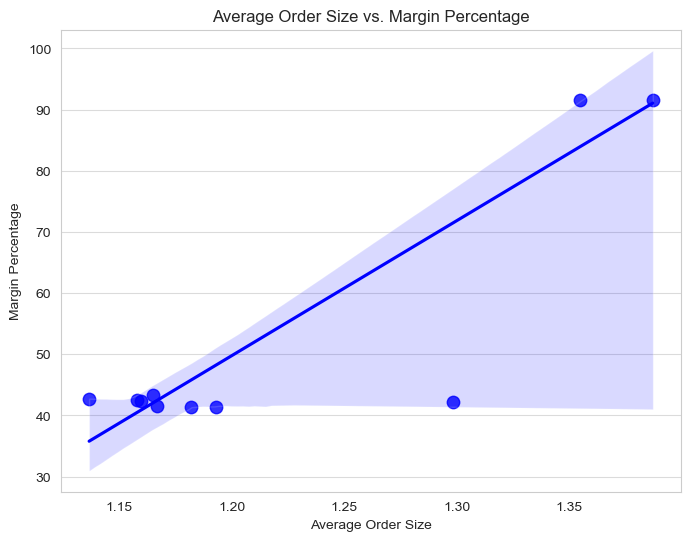

In [235]:
# Set the style of the plot
sns.set_style('whitegrid')

# Create a new figure with a specific size
plt.figure(figsize=(8, 6))

# Create a regression plot with average order size on the x-axis and margin percentage on the y-axis
# Use the color blue and set the size of the scatter points to 80
# Use robust regression to downweight the influence of outliers
sns.regplot(x=df_osize['AVG_ORDER_SIZE'], y=df_osize['MARGIN_PERC'], color='b', 
            scatter_kws={'s':80}, robust=True)

# Set the title, x-label, and y-label of the plot
plt.title('Average Order Size vs. Margin Percentage')
plt.xlabel('Average Order Size')
plt.ylabel('Margin Percentage')

# Display the plot
plt.show()

# Top 5 countries - Average Order Size

In [206]:
%%sql o <<
SELECT 
  purchases.COUNTRY,
  AVG(purchases_items.COUNT) AS AVG_ORDER_SIZE
FROM 
  purchases
  JOIN purchases_items ON purchases.PURCHASE_ID = purchases_items.PURCHASE_ID 
  and purchases.VENUE_ID = purchases_items.VENUE_ID
GROUP BY 
  purchases.COUNTRY
ORDER BY 
  AVG_ORDER_SIZE DESC
LIMIT 
  5

 * sqlite:///db
Done.
Returning data to local variable o


In [207]:
df_ordsize= o.DataFrame()
df_ordsize

,COUNTRY,AVG_ORDER_SIZE
0,SVK,1.671952
1,AZE,1.543112
2,HUN,1.525082
3,CZE,1.460419
4,SVN,1.459091


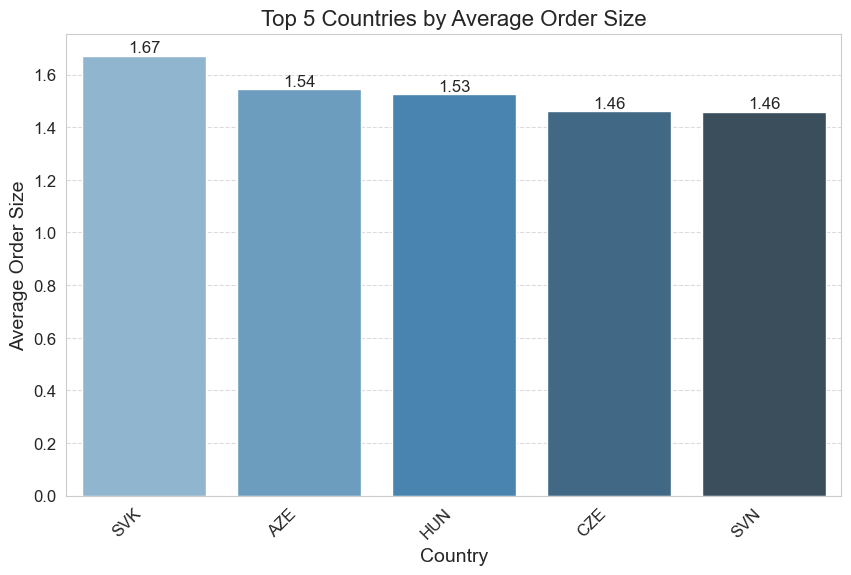

In [231]:
# set style to whitegrid
sns.set_style('whitegrid') 

# set figure size
plt.figure(figsize=(10, 6))

# create bar plot using seaborn
sns.barplot(x='COUNTRY', y='AVG_ORDER_SIZE', data=df_ordsize, palette='Blues_d')

# set title and labels
plt.title('Top 5 Countries by Average Order Size', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Average Order Size', fontsize=14)

# add grid and adjust tick labels
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# add value labels on top of each bar
for i, v in enumerate(df_ordsize['AVG_ORDER_SIZE']):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom', fontsize=12)

# show plot
plt.show()

# Top 5 countries - Average Order Value

In [203]:
%%sql ov <<
SELECT 
  purchases.COUNTRY, purchases.CURRENCY,
  AVG(purchases_items.BASEPRICE * purchases_items.COUNT) AS AVG_ORDER_VALUE
FROM 
  purchases
  JOIN purchases_items ON purchases.PURCHASE_ID = purchases_items.PURCHASE_ID 
  and purchases.VENUE_ID = purchases_items.VENUE_ID
GROUP BY 
  purchases.COUNTRY, purchases.CURRENCY
ORDER BY 
  AVG_ORDER_VALUE DESC
LIMIT 
  5

 * sqlite:///db
Done.
Returning data to local variable ov


In [204]:
df_ordvalve= ov.DataFrame()
df_ordvalve

,COUNTRY,CURRENCY,AVG_ORDER_VALUE
0,KAZ,KZT,1178.605098
1,HUN,HUF,1055.251103
2,SRB,RSD,313.082856
3,CZE,CZK,66.815633
4,NOR,NOK,49.523872


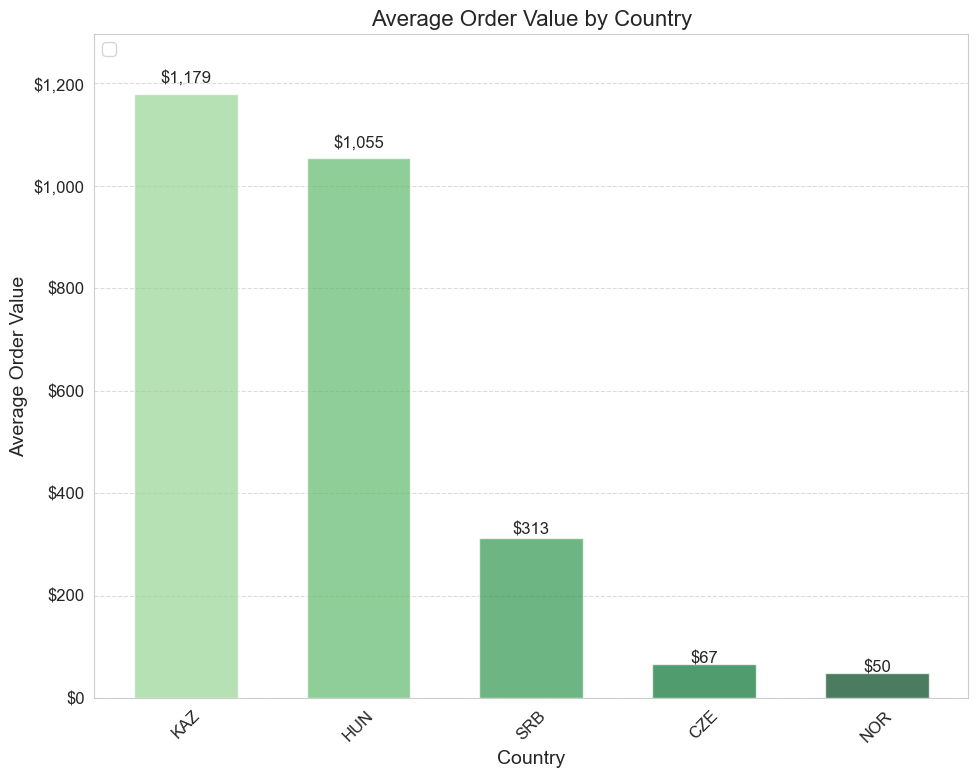

In [230]:
colors = plt.cm.Greens(np.linspace(0.4, 1, len(df_ordvalve)))  # color selection

fig, ax = plt.subplots(figsize=(10, 8))

# plot the bar chart
ax.bar(df_ordvalve['COUNTRY'], df_ordvalve['AVG_ORDER_VALUE'],
       color=colors, edgecolor='white', linewidth=1, alpha=0.7,
       width=0.6, align='center')

# set the y-axis limit
ax.set_ylim(0, max(df_ordvalve['AVG_ORDER_VALUE']) * 1.1)

# set the title and axis labels
ax.set_xlabel('Country', fontsize=14)
ax.set_ylabel('Average Order Value', fontsize=14)
ax.set_title('Average Order Value by Country', fontsize=16)

# add gridlines and format ticks
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.tick_params(axis='x', rotation=45, labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.yaxis.set_major_formatter('${x:,.0f}')

# set legend
handles, labels = ax.get_legend_handles_labels()
labels = ['Average Order Value']
ax.legend(handles, labels, loc='upper left', fontsize=12)

# add value labels at the top of each bar
for i, v in enumerate(df_ordvalve['AVG_ORDER_VALUE']):
    ax.text(i, v*1.02, '${:,.0f}'.format(v), ha='center', fontsize=12)

plt.tight_layout(pad=1.5)
plt.show()

# Top 5 countries - Order Volume

In [200]:
%%sql vol <<
SELECT 
  purchases.COUNTRY,
  SUM(purchases_items.COUNT) AS ORDER_VOLUME
FROM 
  purchases
  JOIN purchases_items ON purchases.PURCHASE_ID = purchases_items.PURCHASE_ID 
   and purchases.VENUE_ID = purchases_items.VENUE_ID
GROUP BY 
  purchases.COUNTRY
ORDER BY 
  ORDER_VOLUME DESC
LIMIT 
  5

 * sqlite:///db
Done.
Returning data to local variable vol


In [201]:
df_ordvolume= vol.DataFrame()
df_ordvolume

,COUNTRY,ORDER_VOLUME
0,FIN,488770
1,DNK,260541
2,GRC,206474
3,HUN,157175
4,EST,130930


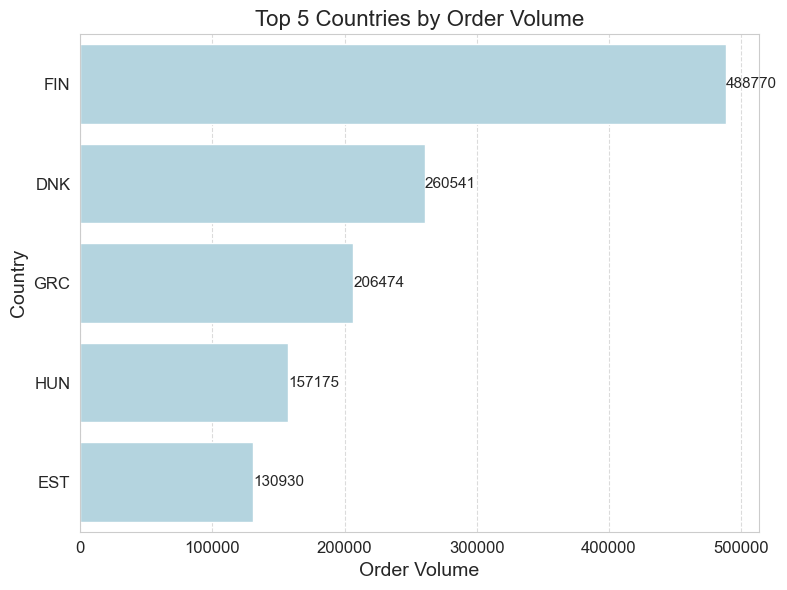

In [233]:
# set the plotting style
sns.set_style('whitegrid')

# create a figure with a specific size
plt.figure(figsize=(8, 6))

# sort the data by order volume in descending order
df_ordvolume.sort_values('ORDER_VOLUME', ascending=False, inplace=True)

# create a bar plot of order volume by country
sns.barplot(x='ORDER_VOLUME', y='COUNTRY', data=df_ordvolume, color='lightblue')

# add a title and axis labels
plt.title('Top 5 Countries by Order Volume', fontsize=16)
plt.xlabel('Order Volume', fontsize=14)
plt.ylabel('Country', fontsize=14)

# add a grid to the x-axis
plt.grid(axis='x', linestyle='--', alpha=0.7)

# set the font size of the tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# add labels to the end of each bar
for i, v in enumerate(df_ordvolume['ORDER_VOLUME']):
    plt.text(v + 0.4, i, str(v), ha='left', va='center', fontsize=11)

# adjust the layout to avoid overlapping elements
plt.tight_layout()

# show the plot
plt.show()

# Monthly Cumulative Woltwide Margin

In [196]:
%%sql mon <<
WITH purchases_cumulative AS (
    SELECT 
        COALESCE(p.CURRENCY, 'Total') AS CURS, 
        GROUP_CONCAT(DISTINCT CASE WHEN i.CURRENCY = p.CURRENCY THEN i.CURRENCY 
                     ELSE NULL END) AS CURRENCY,
        strftime('%Y-%m', p.TIME_RECEIVED) AS month, 
        (SUM((pi.BASEPRICE * pi.COUNT) - (i.COST_PER_UNIT * pi.COUNT)) / 
         SUM(pi.BASEPRICE * pi.COUNT))*100 AS margin_perc
    FROM 
        purchases p
        JOIN purchases_items pi ON p.PURCHASE_ID = pi.PURCHASE_ID 
        and p.VENUE_ID = pi.VENUE_ID
        JOIN items i ON pi.PRODUCT_ID = i.PRODUCT_ID 
        and pi.VENUE_ID = i.VENUE_ID
    GROUP BY 
        p.CURRENCY, month
)
SELECT 
    CURRENCY, 
    month, 
    margin_perc, 
    SUM(margin_perc) OVER (PARTITION BY CURRENCY ORDER BY month) AS Cumulative_Margin
FROM 
    purchases_cumulative
ORDER BY 
    CURRENCY, month;

 * sqlite:///db
Done.
Returning data to local variable mon


In [197]:
df_cummargin= mon.DataFrame()
df_cummargin.sort_values('Cumulative_Margin', ascending=False)

,CURRENCY,month,margin_perc,Cumulative_Margin
37,HRK,2022-12,91.539437,366.092198
19,DKK,2022-12,40.337711,295.915271
36,HRK,2022-11,91.553586,274.552762
18,DKK,2022-11,43.574017,255.577560
49,ILS,2022-12,40.709629,239.938871
...,...,...,...,...
20,EUR,2022-06,31.953705,31.953705
1,AZN,2022-07,30.421474,30.421474
50,KZT,2022-10,29.574324,29.574324
38,HUF,2022-07,25.200139,25.200139


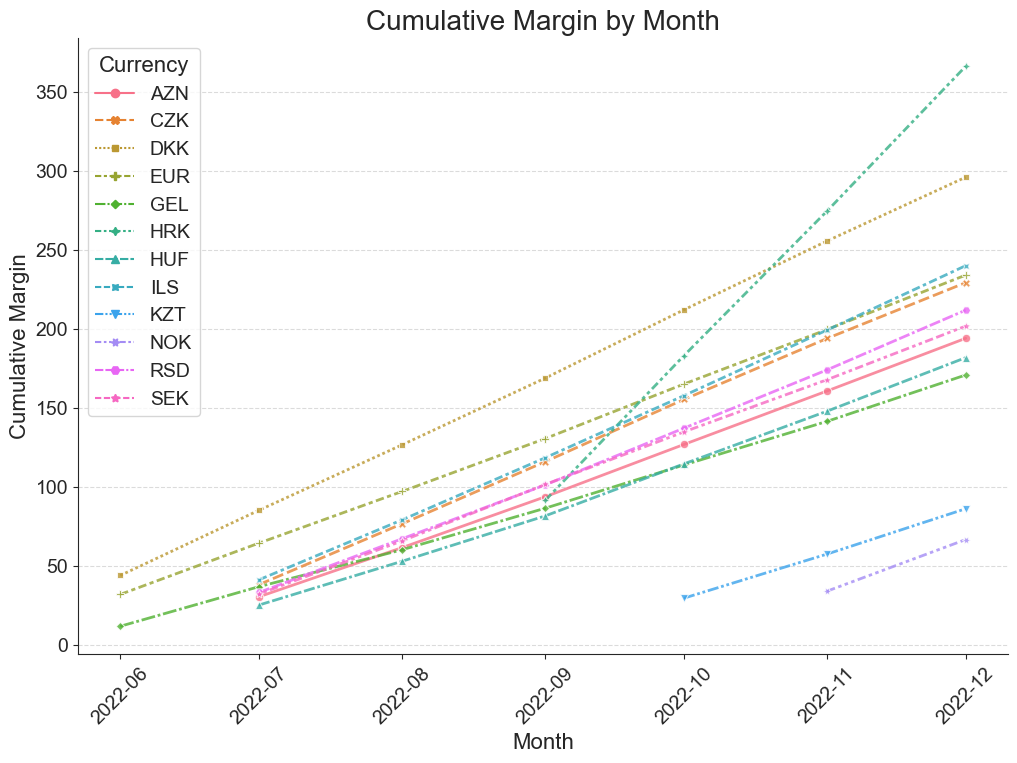

In [234]:
plt.figure(figsize=(12, 8))

# Set the style and palette of the plot
sns.set_style('ticks')
sns.set_palette('deep')

# Convert the 'month' column to datetime format
df_cummargin['month'] = pd.to_datetime(df_cummargin['month'], format='%Y-%m')

# Create the line plot
sns.lineplot(x='month', y='Cumulative_Margin', hue='CURRENCY', data=df_cummargin, style='CURRENCY', 
             linewidth=2, markers=True, alpha=0.8)

# Set the labels and title of the plot
plt.xlabel('Month', fontsize=16)
plt.ylabel('Cumulative Margin', fontsize=16)
plt.title('Cumulative Margin by Month', fontsize=20)

# Set the font sizes of the tick labels
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

# Add a legend to the plot
plt.legend(title='Currency', loc='upper left', fontsize=14, title_fontsize=16)

# Remove the top and right spines of the plot and set the grid
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

#### 1. What assumptions about the data did you make when creating your gross margin calculations?

    Some assumptions I made about the data when creating the gross margin calculations included:

    i) The cost_per_unit column represents the actual cost of producing each unit sold and is accurate  
    ii) The vat_percentage column is applied consistently across all purchases and accurately reflects the amount of value-added tax included in the purchase price  
    iii) The applicable_tax_perc column is applied consistently across all purchases and accurately reflects any additional taxes or fees included in the purchase price  
    iv) All relevant data, such as item prices, purchase dates, and currency exchange rates, are included in the data set  
    v) The gross margin calculations do not take into account any overhead costs or other expenses associated with running the business
    
    
#### 2. Did you encounter any problems in the data? And if you did, how did you solve them? 

    As I worked through the data in the case study, I encountered a few challenges that needed to be addressed. One of the standout issues was handling currency conversions across multiple tables. However, instead of using a currency conversion tool, I utilized SQL case statements to tackle it. In addition, I paid close attention to the accuracy and reliability of the data itself. I checked for any data inconsistencies to ensure its accuracy and reliability.
    
    
#### 3. Which additional data sources or business information do you think could be used to improve your solution?

    There are several additional data sources or business information that could be used to improve the solution for this case study. Some potential examples include:

    i) Customer demographics: Gathering information on customer age, gender, income level, and other demographics could provide insights into customer behavior and preferences, which could inform pricing strategies and product offerings  
    ii) Competitor pricing: Monitoring the pricing strategies of competitors could help the company stay competitive and adjust their own prices accordingly  
    iii) Customer feedback and reviews: Analyzing customer feedback and reviews could provide insights into areas where the company could improve their products and services  
    iv) Sales and marketing data: Analyzing sales and marketing data, such as conversion rates, click-through rates, and customer acquisition costs, could help the company optimize their marketing campaigns and improve their overall sales strategy  
    v) Economic data: Monitoring economic indicators such as consumer confidence, inflation rates, and GDP growth could provide insights into overall market trends and consumer behavior